In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

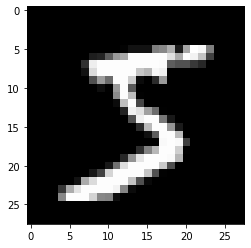

In [4]:
plt.imshow(x_train[0].reshape((28,28)),cmap='gray')
plt.show()

In [5]:
%%time
#Create a Random Forest classifier with default value
rf=RandomForestClassifier()


CPU times: user 33 µs, sys: 6 µs, total: 39 µs
Wall time: 42.7 µs


In [6]:
%%time
rf.fit(x_train,y_train)

CPU times: user 40.5 s, sys: 199 ms, total: 40.7 s
Wall time: 40.5 s


RandomForestClassifier()

In [7]:
%%time
rf_predictions = rf.predict(x_test)

CPU times: user 398 ms, sys: 16 ms, total: 414 ms
Wall time: 412 ms


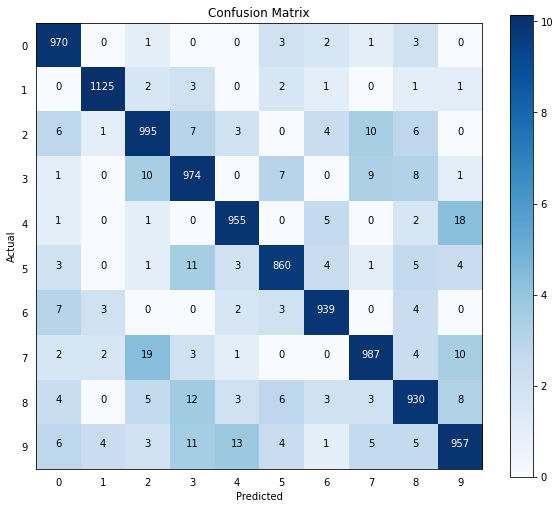

In [8]:
con_matrix = confusion_matrix(y_test,rf_predictions)

f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(con_matrix+1),cmap="Blues")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = con_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(con_matrix[i,j]),horizontalalignment="center",color="white" if con_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix2.png")
plt.show()

In [9]:
score=accuracy_score(y_test,rf_predictions)
print("Random Forest Accuracy Score: {0}".format(score))

Random Forest Accuracy Score: 0.9692


In [10]:
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


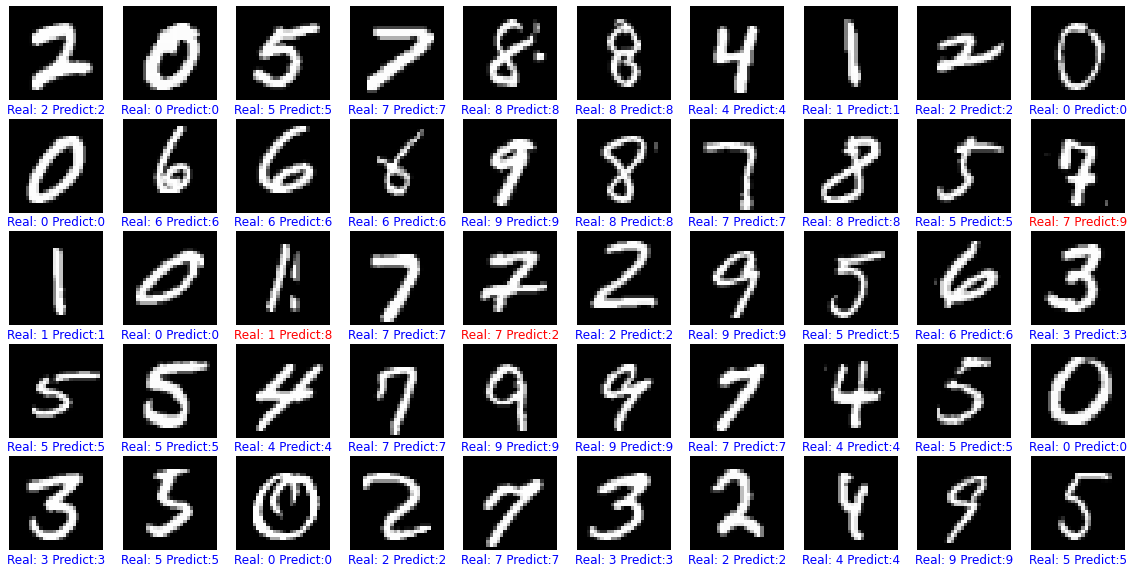

In [11]:
rows = 5
cols = 10
sub_plot = 1
f = plt.figure(figsize=(2*cols,2*rows))
for i in range(50):
      index = random.randint(0,10000)
      f.add_subplot(rows,cols,sub_plot) 
      sub_plot+=1
      plt.imshow(x_test[index].reshape((28,28)),cmap='gray')
      plt.axis("off")
      if rf_predictions[index] == y_test[index]:
        plt.title("Real: "+str(y_test[index])+" Predict:"+str(int(rf_predictions[index])), y=-0.20,color="Blue")
      else: 
        plt.title("Real: "+str(y_test[index])+" Predict:"+str(int(rf_predictions[index])), y=-0.20,color="Red")
plt.savefig("predictions.png")
plt.show()